In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15,8)

In [3]:
df = pd.read_csv('data/clean_dataset.csv')
df.sample(3)

,Unnamed: 0,title,author,published_date,clean_url,excerpt,summary,rank,topic,country,language,media,is_opinion,_score,_id,date
401,1165,Shirin Neshat on the protests in Iran – DW – 1...,NaN,2022-10-28 00:15:00,dw.com,Iranian exile Shirin Neshat is an acclaimed in...,Iranian exile Shirin Neshat is an acclaimed in...,387,news,DE,en,https://static.dw.com/image/63539337_6.jpg,False,18.187658,3701c5556cd8494bdcbf6792a46026c8,2022-10-28
1615,4694,Tehran students hold vigils for Mahsa Amini,NaN,2022-10-26 12:00:00,msn.com,Send MSN Feedback Please give an overall site ...,Send MSN Feedback \nPlease give an overall sit...,100,world,US,en,https://img-s-msn-com.akamaized.net/tenant/amp...,False,21.002626,2229903f5aef9c3a3632c40053f6614c,2022-10-26
3694,10726,How desire for freedom is uniting women of Ira...,Sophia Lopez,2022-10-24 15:00:00,thegauntlet.ca,"By Ansharah Shakil, October 24 2022— Two diffe...","By Ansharah Shakil, October 24 2022— Two diff...",216692,news,CA,en,https://thegauntlet.ca/wp-content/uploads/2022...,False,13.606030,4994b141791a55fba75640641f533541,2022-10-24


Text(0, 0.5, 'Count')

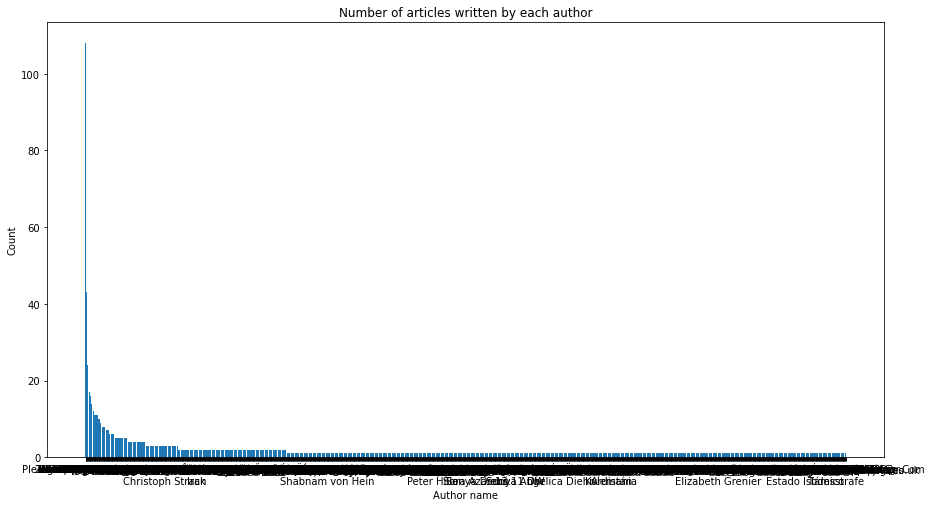

In [5]:
authors = df['author'].value_counts()
plt.bar(authors.index, authors.values)
plt.title("Number of articles written by each author")
plt.xlabel("Author name")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

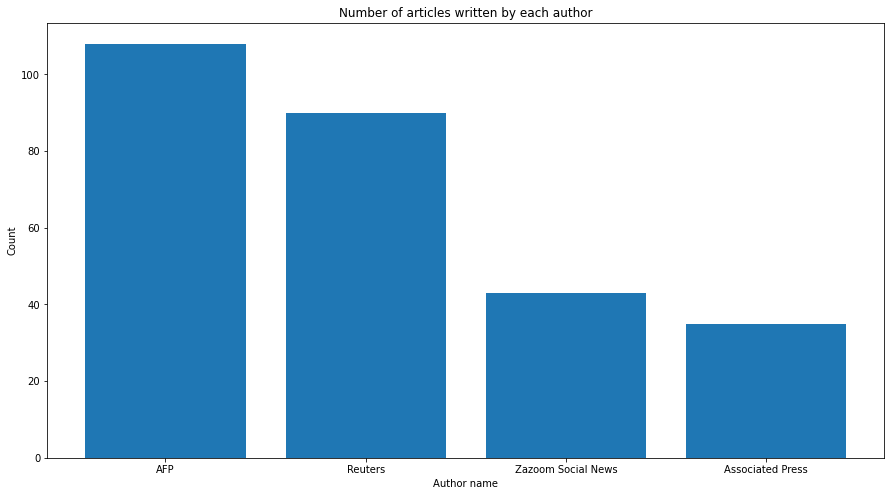

In [6]:
active_authors = authors[authors>25]

plt.bar(active_authors.index, active_authors.values)
plt.title("Number of articles written by each author")
plt.xlabel("Author name")
plt.ylabel("Count")

In [7]:
df['date'] = pd.to_datetime(df['published_date']).dt.date

Text(0, 0.5, 'Number of articles about this subject')

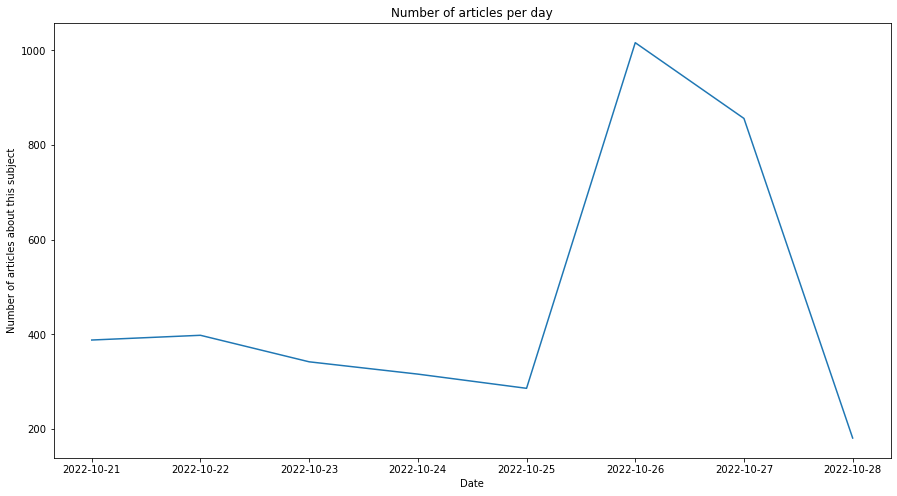

In [8]:
df.groupby('date')['_id'].count().plot(kind='line')
plt.title("Number of articles per day")
plt.xlabel("Date")
plt.ylabel("Number of articles about this subject")


Text(0, 0.5, 'Number of articles about this subject')

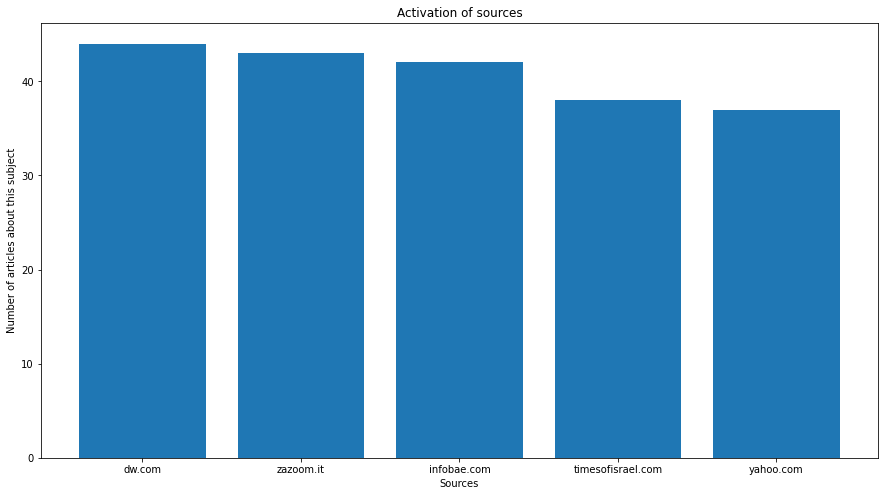

In [9]:
sources = df['clean_url'].value_counts()
active_sources = sources[sources > 30]

plt.bar(active_sources.index, active_sources.values)
plt.title("Activation of sources")
plt.xlabel("Sources")
plt.ylabel("Number of articles about this subject")

Text(0, 0.5, 'Count')

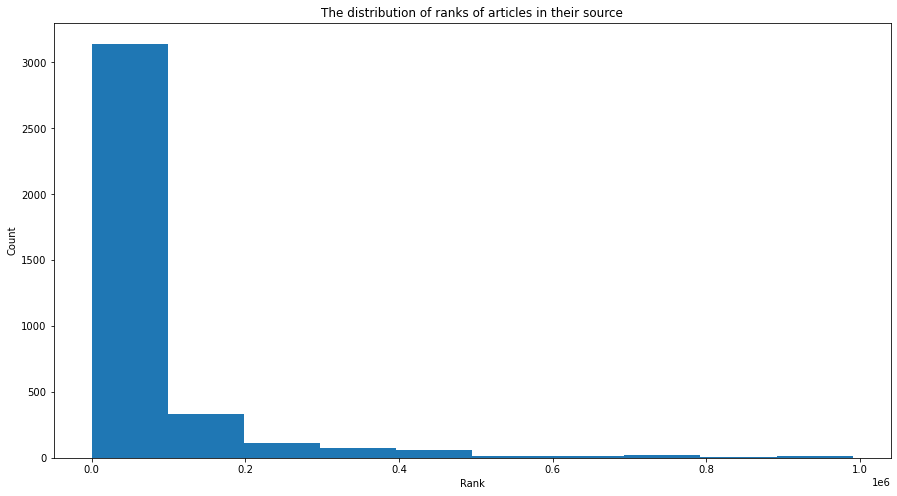

In [10]:
plt.hist(df['rank'])
plt.title("The distribution of ranks of articles in their source")
plt.xlabel("Rank")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

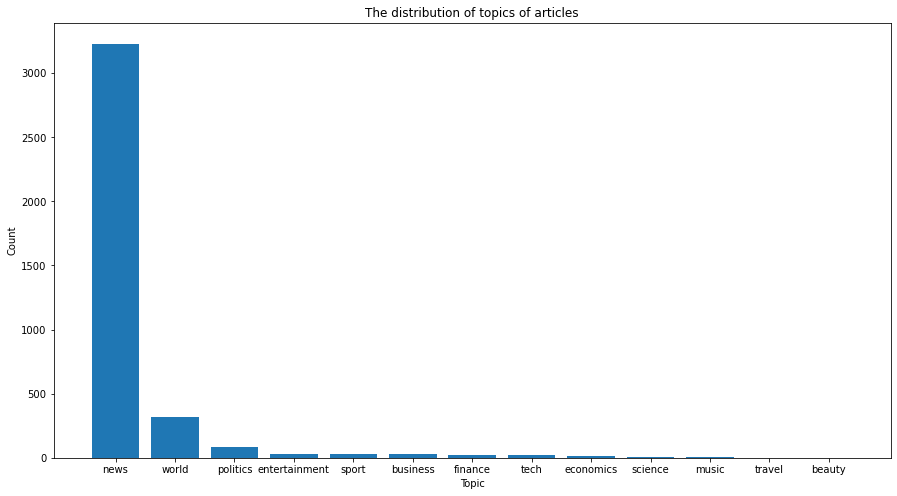

In [11]:
topics = df['topic'].value_counts()

plt.bar(topics.index, topics.values)
plt.title("The distribution of topics of articles")
plt.xlabel("Topic")
plt.ylabel("Count")

In [26]:
topics = df['topic'].value_counts()
topics = topics.reset_index()

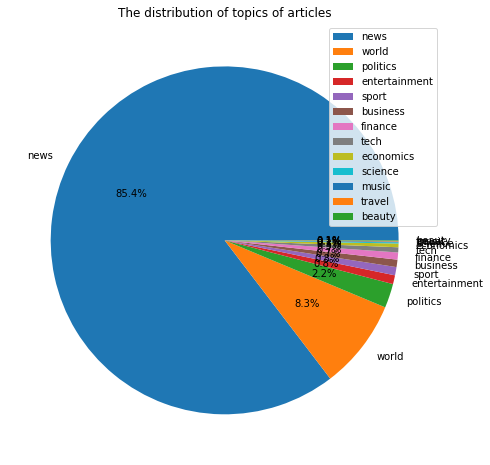

In [34]:
plt.pie(topics['topic'], labels=topics['index'], autopct='%1.1f%%')
plt.title("The distribution of topics of articles")
plt.legend()

Text(0, 0.5, 'Count')

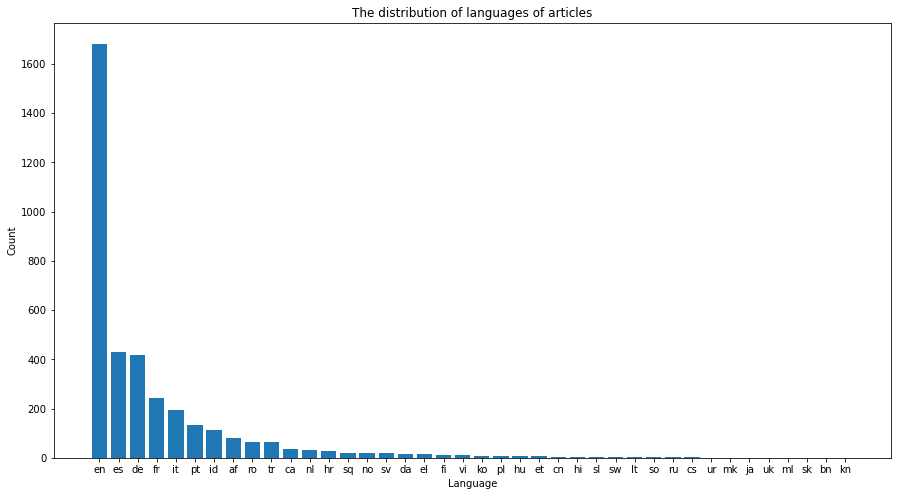

In [12]:
languages = df['language'].value_counts()

plt.bar(languages.index, languages.values)
plt.title("The distribution of languages of articles")
plt.xlabel("Language")
plt.ylabel("Count")

In [16]:
countries = pd.read_csv('data/geolocations.csv')

In [17]:
countries

,country_name,news_num,latitude,longitude
0,US,701,39.783730,-100.445882
1,DE,347,51.163818,10.447831
2,FR,211,46.603354,1.888334
3,IT,205,42.638426,12.674297
4,GB,192,54.702354,-3.276575
...,...,...,...,...
107,BY,1,53.425061,27.697136
108,PG,1,-5.681607,144.248908
109,CI,1,7.989737,-5.567946
110,GH,1,8.030028,-1.080027


In [19]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

#for each coordinate, create circlemarker of user percent
for i in range(len(countries)):
        if countries.iloc[i]['latitude']:
                lat = countries.iloc[i]['latitude']
                long = countries.iloc[i]['longitude']
                radius=5
                popup_text = """Country : {}<br>
                        %of Users : {}<br>"""
                popup_text = popup_text.format(countries.iloc[i]['country_name'],
                                        countries.iloc[i]['news_num']
                                        )
                folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

Text(0, 0.5, 'Count')

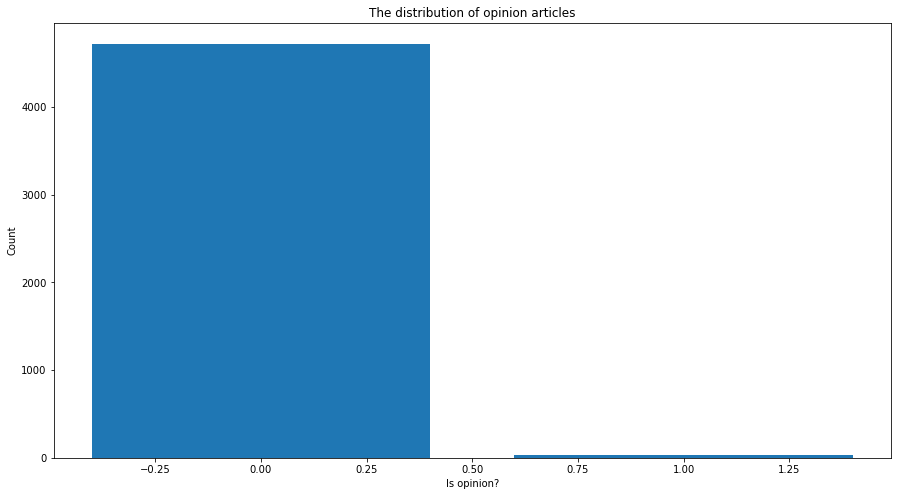

In [37]:
opinion = df['is_opinion'].value_counts()


plt.bar(opinion.index, opinion.values)
plt.title("The distribution of opinion articles")
plt.xlabel("Is opinion?")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

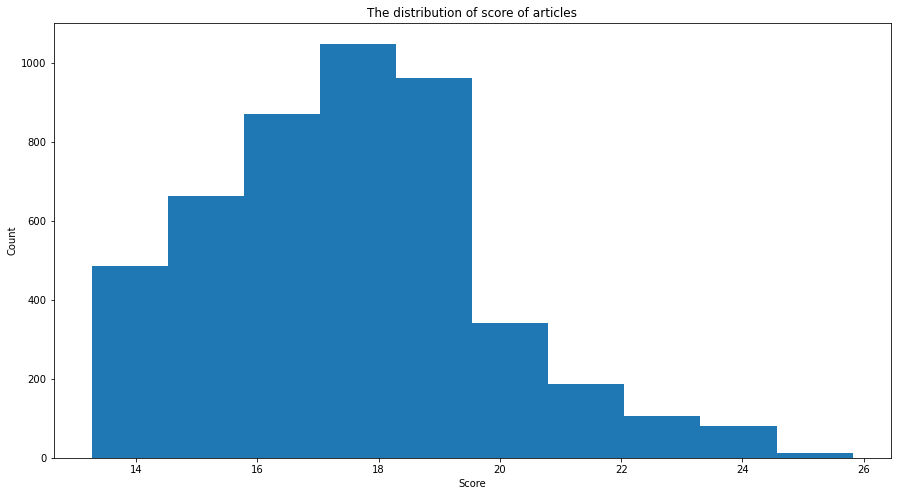

In [38]:
plt.hist(df['_score'])
plt.title("The distribution of score of articles")
plt.xlabel("Score")
plt.ylabel("Count")